In [1]:
import pandas as pd
import numpy as np

In [2]:
sample =pd.read_csv('./analysis1.csv', encoding='cp949') ## 전처리된 데이터 가져오기

In [3]:
#보루타 알고리즘을 할때는 모든 x값은 모든 데이터(타깃 정보를 제외한)
#보루타 알고리즘의 y값은 모든 포지션은 0DF 1MF 2FW로 이루어진 데이터를 제공
#Y값을 DF일때는 수비수는 1 미드필더, 공격수는 0
#Y값을 MF일때는 미드필더 1 수비수0 공격수 0
#Y값을 FW일때는 공격수1 수비수0 미드필더 0

In [4]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X=sample.iloc[:,2:] #모든 포지션에 관하여
y=y=sample['포지션'] #모든 포지션

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=5)

# Define the Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features
boruta_selector.fit(X.values, y.values)

# Print the selected features
selected_features = X.columns[boruta_selector.support_].to_list()
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	24
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	24
Tentative: 	9
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	14 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	15 / 100
Confirmed: 	24
Tentative: 	8
Rejected: 	1
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	7
Rejected: 	1
I

In [5]:
y.values

array([0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2,

In [6]:
new_arr = np.where(y.values == 2, 1, 0)
new_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
X=sample.iloc[:,2:] #수비수
new_arr = np.where(y.values == 0, 1, 0)
y_def = new_arr #수비수

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=5)

# Define the Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features
boruta_selector.fit(X.values, y_def)

# Print the selected features
selected_features = X.columns[boruta_selector.support_].to_list()
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	24
Tentative: 	9
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	24
Tentative: 	7
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	24
Tentative: 	7
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	24
Tentative: 	7
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	24
Tentative: 	7
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	24
Tentative: 	7
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	24
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	24
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	3
I

#수비수 주요 스텟
"""['shooting', 'shootontarget', 'insidepashoot',
'outsidepashoot', 'freekick', 'throwin', 'keypass',
'forwardpass', 'backpass', 'lateralpass', 'attackareapass',
'defensiveareapass', 'centerareapass', 'longpass', 'middistancepass', 
'shortpass', 'airduel', 'tackle', 'clearing', 'intercept', 'block', 'acquisition', 
'block.1', 'miss', 'foul', 'fouled']"""

In [8]:
X=sample.iloc[:,2:]#미드필드
new_arr = np.where(y.values == 1, 1, 0)
y_def = new_arr #미드필드

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=5)

# Define the Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features
boruta_selector.fit(X.values, y_def)

# Print the selected features
selected_features = X.columns[boruta_selector.support_].to_list()
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	12
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	18
Tentative: 	10
Rejec

###미드필드 수요 스텟
"""['shooting', 'shootontarget', 'insidepashoot', 'outsidepashoot', 'cornerkick', 'throwin', 'forwardpass', 'backpass', 'attackareapass', 'defensiveareapass', 'middistancepass', 'shortpass', 'groundduel', 'airduel', 'tackle', 'clearing', 'intercept', 'acquisition', 'block.1', 'foul']"""

In [9]:
X=sample.iloc[:,2:] #공격수
new_arr = np.where(y.values == 2, 1, 0)
y_def = new_arr #공격수

# Define the random forest classifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', max_depth=5)

# Define the Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features
boruta_selector.fit(X.values, y_def)

# Print the selected features
selected_features = X.columns[boruta_selector.support_].to_list()
print(selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	11
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	18
Tentative: 	10
Rejec

### 공격수 주요 스텟
"""['scoring', 'shooting', 'shootontarget', 'insidepashoot', 'freekick', 'forwardpass', 'lateralpass', 'defensiveareapass', 'centerareapass', 'longpass', 'middistancepass', 'shortpass', 'groundduel', 'airduel', 'clearing', 'intercept', 'block', 'block.1', 'miss']"""

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
X=sample[sample['포지션']==2] ## X를 통한 포지션 선택

,선수명,포지션,scoring,assist,shooting,shootontarget,insidepashoot,outsidepashoot,freekick,cornerkick,...,airduel,tackle,clearing,intercept,block,acquisition,block.1,miss,foul,fouled
8,이지훈,2,0.000000,0.000000,0.006617,0.001654,0.004963,0.001654,0.001654,0.001654,...,0.018197,0.020678,0.011580,0.012407,0.010753,0.040529,0.019851,0.007444,0.005790,0.014888
17,일류첸코,2,0.004263,0.000474,0.025580,0.010422,0.019896,0.005685,0.000000,0.000474,...,0.100426,0.015159,0.010422,0.005685,0.005685,0.044529,0.010422,0.011369,0.020843,0.016580
18,조규성,2,0.006521,0.001918,0.036824,0.017645,0.023782,0.013042,0.001918,0.000000,...,0.089758,0.006521,0.014960,0.009206,0.000384,0.042578,0.005370,0.013042,0.017261,0.021481
45,이준석,2,0.000000,0.001567,0.015674,0.001567,0.010972,0.004702,0.000000,0.000000,...,0.036050,0.003135,0.010972,0.014107,0.012539,0.036050,0.012539,0.009404,0.018809,0.012539
64,김민석,2,0.012048,0.004016,0.020080,0.016064,0.016064,0.004016,0.000000,0.000000,...,0.040161,0.016064,0.008032,0.016064,0.004016,0.076305,0.020080,0.008032,0.008032,0.012048
129,세징야,2,0.004678,0.002339,0.037817,0.013645,0.010916,0.026901,0.040156,0.034698,...,0.032749,0.019883,0.003509,0.010136,0.005068,0.053411,0.009357,0.013645,0.007797,0.027680
130,에드가,2,0.002809,0.000000,0.036517,0.008427,0.030899,0.005618,0.000000,0.000000,...,0.191011,0.005618,0.025281,0.002809,0.014045,0.044944,0.002809,0.005618,0.039326,0.019663
151,오후성,2,0.004608,0.000000,0.018433,0.004608,0.013825,0.004608,0.000000,0.004608,...,0.055300,0.046083,0.000000,0.013825,0.023041,0.064516,0.000000,0.018433,0.013825,0.023041
152,발샤,2,0.003279,0.000000,0.027869,0.019672,0.021311,0.006557,0.000000,0.000000,...,0.121311,0.011475,0.009836,0.006557,0.004918,0.031148,0.004918,0.021311,0.021311,0.009836
162,김승준,2,0.003331,0.001332,0.013991,0.007328,0.009327,0.004664,0.000666,0.000666,...,0.033977,0.010660,0.005996,0.010660,0.008661,0.037308,0.014657,0.011326,0.005996,0.008661


In [69]:
features = X[['shooting', 'shootontarget', 'insidepashoot',
                 'outsidepashoot', 'freekick', 'throwin', 'keypass','cross', 'airduel', 'tackle', 'clearing', 'intercept', 'block', 'acquisition',
                 'block.1', 'miss', 'foul', 'fouled']]## 위의 X를 통해 선택한 포지션의 피쳐 대입.
# 패스를 제외하고 나머지 부분을 확인하는것을 추천

C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygl\anacond

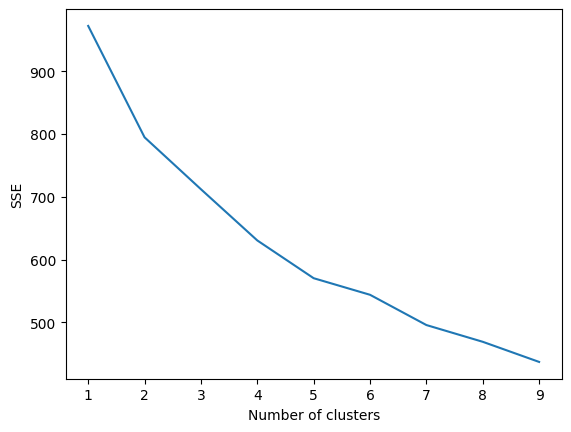

C:\Users\ygl\anaconda3\envs\py3.8\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ygl\AppData\Local\Temp\ipykernel_11888\2536568101.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = cluster_labels


In [76]:
# Preprocess the data by scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
# Plot the SSE values to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 10), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Choose the number of clusters and fit the data to the k-means algorithm
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_features)

# Assign each data point to a cluster
cluster_labels = kmeans.predict(scaled_features)

# Add the cluster labels back to the original DataFrame
X['cluster'] = cluster_labels
features['cluster'] = cluster_labels

In [43]:
cluster_means = features.groupby(cluster_labels).mean()

In [71]:
cluster_means.iloc[0].nlargest(2)

acquisition    0.060435
airduel        0.038098
Name: 0, dtype: float64

In [72]:
cluster_means = features.groupby(cluster_labels).mean()

# Print the main features for each cluster
for i in range(len(cluster_means)):
    print(f"Cluster {i} main features:")
    print(cluster_means.iloc[i].nlargest(5))
    print()

Cluster 0 main features:
airduel          0.105269
acquisition      0.036283
shooting         0.025780
insidepashoot    0.020025
foul             0.017311
Name: 0, dtype: float64

Cluster 1 main features:
acquisition    0.061795
airduel        0.038340
cross          0.032031
tackle         0.024837
block.1        0.019087
Name: 1, dtype: float64



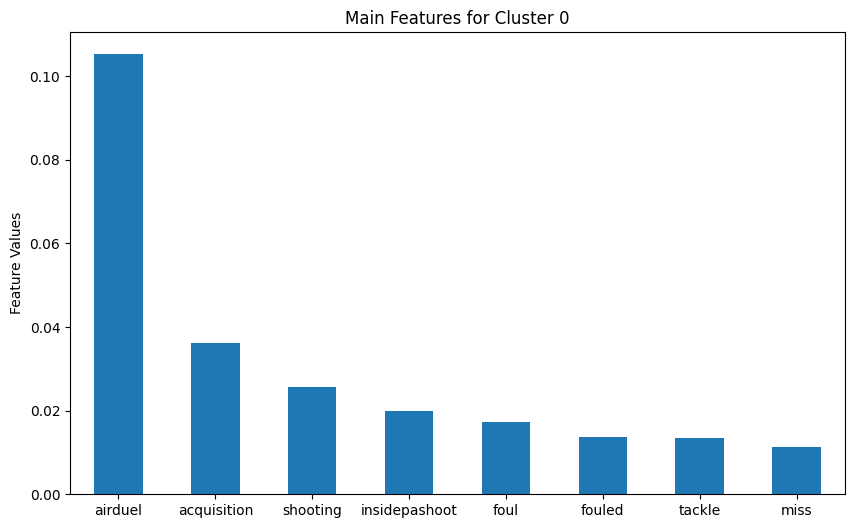

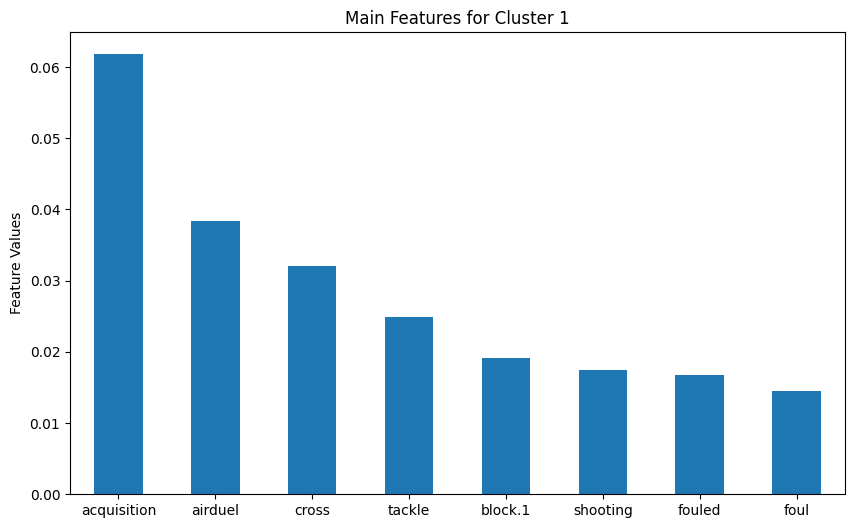

In [73]:
for i in range(len(cluster_means)):
    fig, ax = plt.subplots(figsize=(10,6))
    top_5 = cluster_means.iloc[i].nlargest(8)  # Get top 5 features
    top_5.plot(kind='bar', ax=ax)
    ax.set_ylabel('Feature Values')
    ax.set_title(f'Main Features for Cluster {i}')
    ax.set_xticklabels(top_5.index, rotation=0)  # Set x-tick labels
    plt.show()

In [77]:
features

,shooting,shootontarget,insidepashoot,outsidepashoot,freekick,throwin,keypass,cross,airduel,tackle,clearing,intercept,block,acquisition,block.1,miss,foul,fouled,cluster
8,0.006617,0.001654,0.004963,0.001654,0.001654,0.052936,0.004136,0.019024,0.018197,0.020678,0.011580,0.012407,0.010753,0.040529,0.019851,0.007444,0.005790,0.014888,1
17,0.025580,0.010422,0.019896,0.005685,0.000000,0.000474,0.010422,0.009000,0.100426,0.015159,0.010422,0.005685,0.005685,0.044529,0.010422,0.011369,0.020843,0.016580,0
18,0.036824,0.017645,0.023782,0.013042,0.001918,0.003452,0.012658,0.018796,0.089758,0.006521,0.014960,0.009206,0.000384,0.042578,0.005370,0.013042,0.017261,0.021481,0
45,0.015674,0.001567,0.010972,0.004702,0.000000,0.001567,0.003135,0.029781,0.036050,0.003135,0.010972,0.014107,0.012539,0.036050,0.012539,0.009404,0.018809,0.012539,1
64,0.020080,0.016064,0.016064,0.004016,0.000000,0.000000,0.012048,0.024096,0.040161,0.016064,0.008032,0.016064,0.004016,0.076305,0.020080,0.008032,0.008032,0.012048,1
129,0.037817,0.013645,0.010916,0.026901,0.040156,0.004678,0.026121,0.081481,0.032749,0.019883,0.003509,0.010136,0.005068,0.053411,0.009357,0.013645,0.007797,0.027680,1
130,0.036517,0.008427,0.030899,0.005618,0.000000,0.000000,0.016854,0.002809,0.191011,0.005618,0.025281,0.002809,0.014045,0.044944,0.002809,0.005618,0.039326,0.019663,0
151,0.018433,0.004608,0.013825,0.004608,0.000000,0.000000,0.013825,0.027650,0.055300,0.046083,0.000000,0.013825,0.023041,0.064516,0.000000,0.018433,0.013825,0.023041,1
152,0.027869,0.019672,0.021311,0.006557,0.000000,0.000000,0.003279,0.008197,0.121311,0.011475,0.009836,0.006557,0.004918,0.031148,0.004918,0.021311,0.021311,0.009836,0
162,0.013991,0.007328,0.009327,0.004664,0.000666,0.001332,0.008661,0.012658,0.033977,0.010660,0.005996,0.010660,0.008661,0.037308,0.014657,0.011326,0.005996,0.008661,1


In [78]:

from scipy.stats import f_oneway, chi2_contingency


# Separate the features and target variable
X = features.drop('cluster', axis=1)
y = features['cluster']
big_f=[]
for col in X.columns:
    clusters = [X[y==i][col] for i in range(max(y)+1)]
    F, p = f_oneway(*clusters)
    if p < 0.05:
        print(f'Feature {col}: F-statistic = {F}, p-value = {p}')
    big_f.append(col)

# # Perform chi-squared test on each feature
# for col in X.columns:
#     crosstab = pd.crosstab(X[col], y)
#     chi2, p, dof, expected = chi2_contingency(crosstab)
#     print(f'Feature {col}: Chi-squared statistic = {chi2}, p-value = {p}')

Feature shooting: F-statistic = 10.359183791073852, p-value = 0.002220533080010136
Feature shootontarget: F-statistic = 7.809344835900935, p-value = 0.007262212247280769
Feature insidepashoot: F-statistic = 41.52138419094027, p-value = 3.810729468938198e-08
Feature freekick: F-statistic = 5.719937859343351, p-value = 0.020425090444020057
Feature throwin: F-statistic = 7.303042496444828, p-value = 0.009275436871059962
Feature cross: F-statistic = 19.23871757710013, p-value = 5.649350060439192e-05
Feature airduel: F-statistic = 49.9996906515597, p-value = 3.812185778727901e-09
Feature tackle: F-statistic = 13.084085597022066, p-value = 0.0006734552109092566
Feature intercept: F-statistic = 33.12708808993433, p-value = 4.669523556026935e-07
Feature acquisition: F-statistic = 35.928592724443675, p-value = 1.9675578948305354e-07
Feature block.1: F-statistic = 23.696455731695206, p-value = 1.0913952815053131e-05
Feature fouled: F-statistic = 4.038609792018082, p-value = 0.04967278595279946


In [79]:
big_f

['shooting',
 'shootontarget',
 'insidepashoot',
 'outsidepashoot',
 'freekick',
 'throwin',
 'keypass',
 'cross',
 'airduel',
 'tackle',
 'clearing',
 'intercept',
 'block',
 'acquisition',
 'block.1',
 'miss',
 'foul',
 'fouled']